Question 1: 
The null hypothesis for TV is that in the presense of newspaper, and radio, TV ads has no affect on the sales. The null hypothesis for radio is that in the presence of TV and newspaper, radio does not affect the sales. The null hypothesis for newspaper is that in the presence of radio and TV, newspaper has no effect on the sales. Based on the data shown, the null hypothesis is false for most predictor and alternative hypothesis is preferred. This is because Intercept, TV, and Radio has very low p-value, which indicates that the likelihood of their coefficient being 0 very low. Therefore they do clearly affect the sales value. Newspaper have shown to have high-p value, therefore it likely to have no correlation to the sales value, thus can be remove from the list of model predictors. 

Question 2:
KNN Classifier is use for predicting qualitative values or categories, while KNN regression methods are used for predicting quantitative values. Therefore algorithm are very similar.

Question 3:
a) 
i) This depends as there is negative coefficient for the interaction between GPA and Level. However, usually this statement is false since Coefficient for Level is high.
ii) This depends as there is negative coefficient for the interaction between GPA and Level. However, usually this statement is true since Coefficient for Level is high.
iii) This is true, since there is a negative coefficient for the interaction between GPA and Level.
iv) This is false, since there is a negative coefficient for the interaction between GPA and Level.


b)
College = 1, IQ = 110, GPA = 4.0

In [1]:
50 + 20 * 4.0 + 0.07 * 110 + 35 + 0.01 * 4.0 * 110 - 10 * 4.0

137.1

c) 
This is not true, as the scale of the variable needs to be considered. The scale of GPA/IQ interaction is the highest out of any variables therefore its coefficient is small to not heavily affect the income.

Question 4:
a) The cubic regression would be better as flexible model have better fit during trainning. 
b) Since the true data is linear, the linear regression have less model bias and also better variance as it is less flexible therefore the error is less by the variance bias tradeoff formula. This makes the RSS of the linear regression less than the cubic regression.

Question 5:
a(i) is equal to x(i) / sum(x(i) ^ 2)

Question 6:
since B0 = y bar - B1 * x bar
y bar = x bar *B1 + B0, thus this shows that x mean and y mean exist on the least square line.

Question 7(Later)

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                            summarize,
                            poly)

In [19]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#Quesiton 8
y = Auto['mpg']
X = pd.DataFrame({'Intercept': np.ones(Auto.shape[0]), 'horsepower': Auto['horsepower']})
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
Intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i) There is a relationship between the predictor and the response, this is clear by the P value being very low. 
ii) The relationship between the predictor and the response, however, moderate. The coefficient for horsepower seems low, however, the scale of horsepower is large, in the 100s, therefore its coefficient is low.
iii) The relationship is positive.

In [4]:
#iv)
design = MS(['horsepower'])
design = design.fit(Auto)

In [5]:
new_df = pd.DataFrame({'horsepower': [98]})
new_X = design.transform(new_df)

new_predictions = results.get_prediction(new_X)
new_predictions.conf_int(alpha=0.005)

array([[23.7577394 , 25.17641491]])

In [6]:
def abline(ax, m, b, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [b + xlim[0] * m, b + xlim[1] * m]
    ax.plot(xlim, ylim, *args, **kwargs)

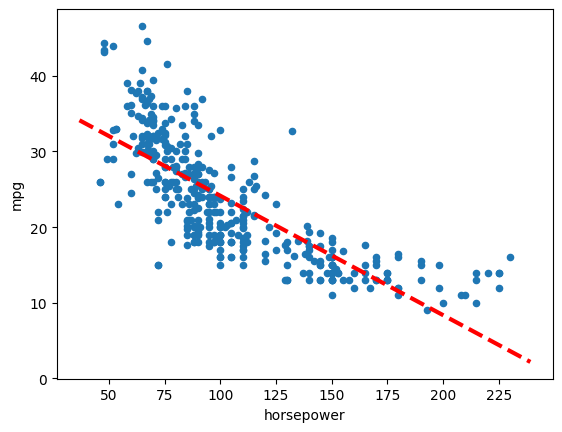

In [7]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, 
       results.params[1], 
       results.params[0],
       'r--',
       linewidth=3)

c) The data suggest another type of relationship between horsepower and mpg that is not of linear regression.

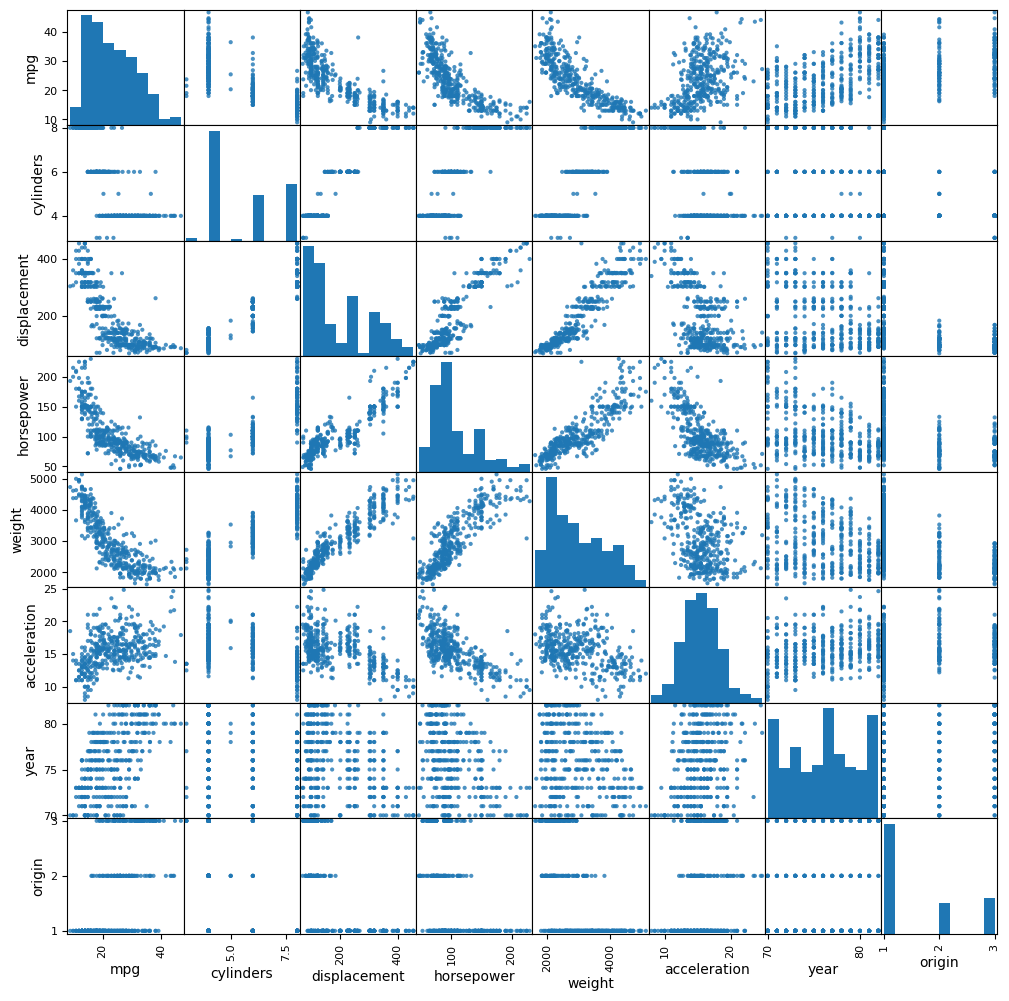

In [8]:
#Question 9
#a
from pandas.plotting import scatter_matrix
scatter_matrix(Auto, alpha=0.8, figsize=(12,12), diagonal='hist');

In [9]:
#b
Auto.corr()

C:\Users\elmow\AppData\Local\Temp\ipykernel_11132\2868559014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [10]:
#c
terms = Auto.columns.drop(['mpg', 'name'])
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [11]:
X = MS(terms).fit_transform(Auto)
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [17]:
anova_lm(results, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


i) Yes, the f-statistic suggest that there is a relationship between the predictors and the response.

ii) Weight, year, origin, have small p-values which suggest significant relationship with the response.

iii) The coefficient of the year value is 0.7508 suggest that mpg almost by 1 for every year. Therefore the fuel increases as years progresses.


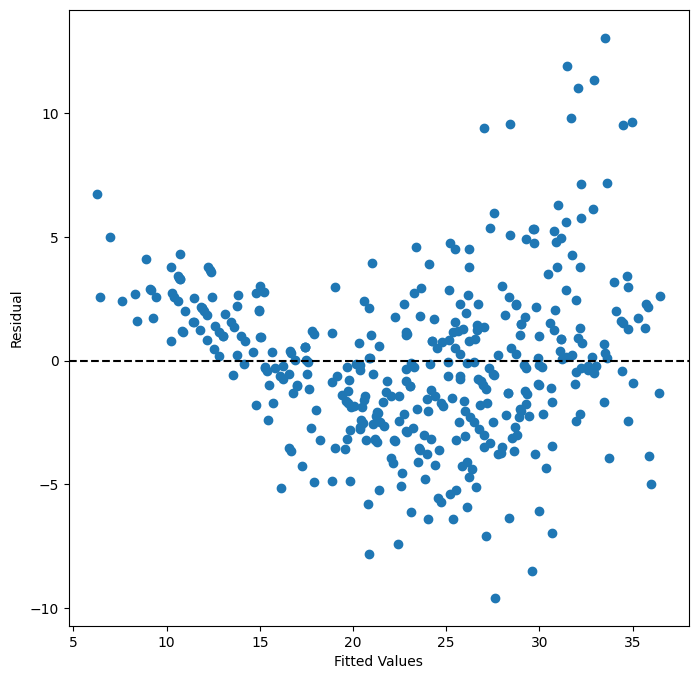

In [24]:
#d
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residual")
ax.axhline(0, c='k', ls='--');

13

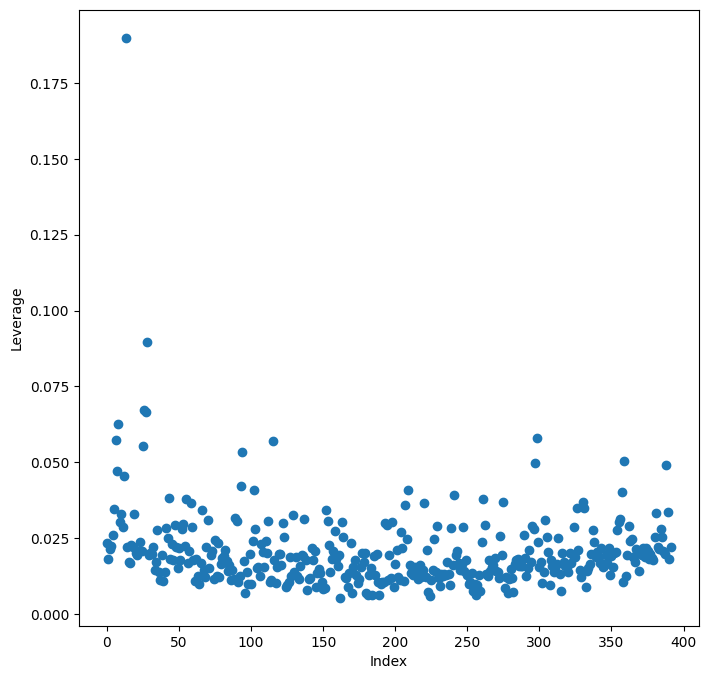

In [25]:
infl = results2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [29]:
#There seems to at least be one data point that far exceeds the other in terms of leverage, this point is very likely be a outliers.